# Week 4 

I am currently in a transportation studio, working on a South Robertson Blvd. in LA. This week, I will be practicing my isochrone mapping  skills by exploring data from this neighborhood. I will create an isochronous map using open street maps to understand what falls within 5, 10, 15, 20 min of the Culvert City expo line walking, biking, and driving. 



## Isochrone map 

### Getting libraries and preping data 

I am first going to dowload the libraries I need for this analysis.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import contextily as ctx
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch


Now I'll establish the point I want to do the map around. I am going to be using the lat/log coordinates for a train statino near the corridor of interest (Kinda a TOD exploration). 

In [2]:
point = 34.028218781494346, -118.38883213880001
network_type = 'walk'
network_type_bike = 'bike'
network_type_drive = 'drive'
trip_times = [5,10,15,20] 
meters_per_minute_walk = 75 
meter_per_minute_bike= 268 #about 10 miles per hour
meter_per_minute_drive= 805 #about 30 miles per hour

Now I'm going to download the street network with a command from the OSMnx data.

In [3]:
%%time

G = ox.graph_from_point(point, dist=1500, dist_type='bbox', network_type=network_type, simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)

CPU times: user 5.09 s, sys: 128 ms, total: 5.22 s
Wall time: 8.63 s


In [4]:
%%time
G_bike = ox.graph_from_point(point, dist=1500, dist_type='bbox', network_type=network_type_bike, simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)

CPU times: user 3.65 s, sys: 24.8 ms, total: 3.68 s
Wall time: 6.29 s


In [5]:
%%time
G_drive = ox.graph_from_point(point, dist=1500, dist_type='bbox', network_type=network_type_drive, simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)

CPU times: user 2.13 s, sys: 19 ms, total: 2.15 s
Wall time: 7.58 s


Now I'll create a simple plot of my location. 

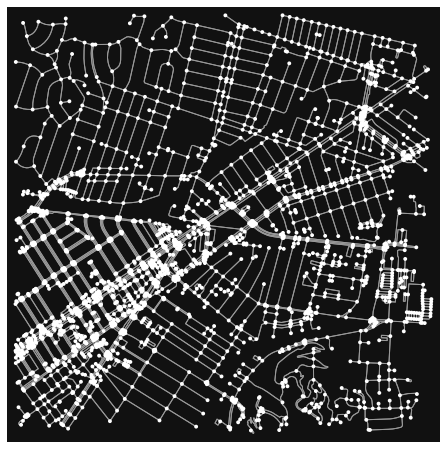

In [6]:
fig, axs= ox.plot_graph(G)



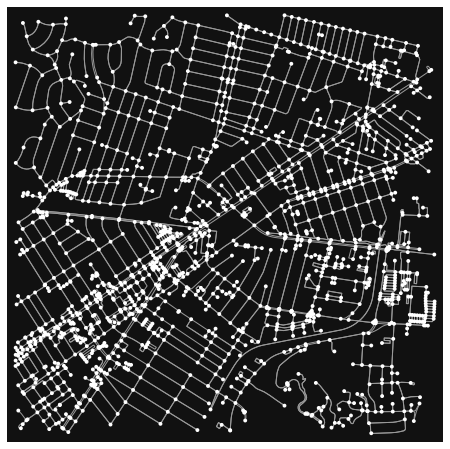

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f96ad07f970>)

In [7]:
ox.plot_graph(G_bike)

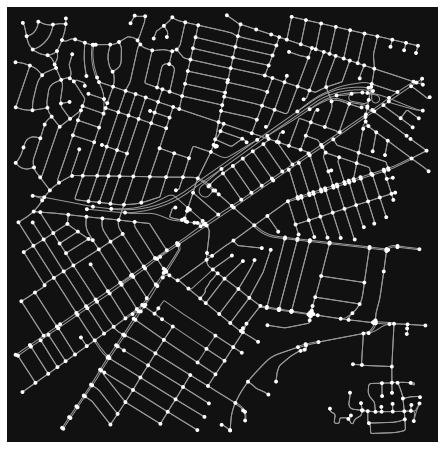

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f96acb13880>)

In [8]:
ox.plot_graph(G_drive)

That looks so cool!!! I think this might be a cool command to use to create maps for art work. 

Anyways, I must proceed. I'll first project my data to Web Mercator. 

In [9]:
G = ox.project_graph(G, to_crs='epsg:3857')
G_bike = ox.project_graph(G_bike, to_crs='epsg:3857')
G_drive = ox.project_graph(G_drive, to_crs='epsg:3857')

Now, I'll convert my nodes and edges to geoframes. I'll first convert them and then run .head and .plot functions to see what they look like. 

In [10]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)


In [11]:
gdf_nodes_bike, gdf_edges_bike = ox.graph_to_gdfs(G_bike)


In [12]:
gdf_nodes_drive, gdf_edges_drive = ox.graph_to_gdfs(G_drive)

In [13]:
gdf_nodes.head()

y             x     osmid          highway         lon  \
15857110  4.031958e+06 -1.317966e+07  15857110  traffic_signals -118.394895   
15857111  4.032077e+06 -1.317958e+07  15857111  traffic_signals -118.394192   
15857112  4.032018e+06 -1.317952e+07  15857112              NaN -118.393623   
15857113  4.032796e+06 -1.317844e+07  15857113  traffic_signals -118.383939   
18166076  4.033459e+06 -1.317776e+07  18166076              NaN -118.377795   

                lat                           geometry  
15857110  34.023503  POINT (-13179659.379 4031958.355)  
15857111  34.024389  POINT (-13179581.211 4032077.316)  
15857112  34.023945  POINT (-13179517.781 4032017.721)  
15857113  34.029738  POINT (-13178439.785 4032795.866)  
18166076  34.034676  POINT (-13177755.894 4033459.143)

In [14]:
gdf_nodes_bike.head()

y             x     osmid          highway         lon  \
15857110  4.031958e+06 -1.317966e+07  15857110  traffic_signals -118.394895   
15857111  4.032077e+06 -1.317958e+07  15857111  traffic_signals -118.394192   
15857112  4.032018e+06 -1.317952e+07  15857112              NaN -118.393623   
15857113  4.032796e+06 -1.317844e+07  15857113  traffic_signals -118.383939   
18166076  4.033459e+06 -1.317776e+07  18166076              NaN -118.377795   

                lat                           geometry  
15857110  34.023503  POINT (-13179659.379 4031958.355)  
15857111  34.024389  POINT (-13179581.211 4032077.316)  
15857112  34.023945  POINT (-13179517.781 4032017.721)  
15857113  34.029738  POINT (-13178439.785 4032795.866)  
18166076  34.034676  POINT (-13177755.894 4033459.143)

In [15]:
gdf_nodes_drive.head()

y             x     osmid          highway         lon  \
15857110  4.031958e+06 -1.317966e+07  15857110  traffic_signals -118.394895   
15857111  4.032077e+06 -1.317958e+07  15857111  traffic_signals -118.394192   
15857113  4.032796e+06 -1.317844e+07  15857113  traffic_signals -118.383939   
18166077  4.033941e+06 -1.317769e+07  18166077  traffic_signals -118.377236   
18166099  4.032809e+06 -1.317884e+07  18166099              NaN -118.387562   

                lat  ref                           geometry  
15857110  34.023503  NaN  POINT (-13179659.379 4031958.355)  
15857111  34.024389  NaN  POINT (-13179581.211 4032077.316)  
15857113  34.029738  NaN  POINT (-13178439.785 4032795.866)  
18166077  34.038263  NaN  POINT (-13177693.622 4033940.970)  
18166099  34.029839  NaN  POINT (-13178843.118 4032809.379)

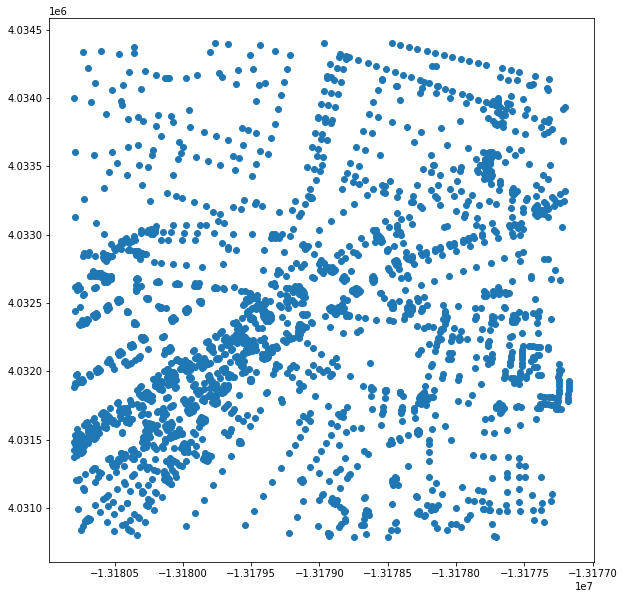

In [16]:
gdf_nodes.plot(figsize=(10,10))

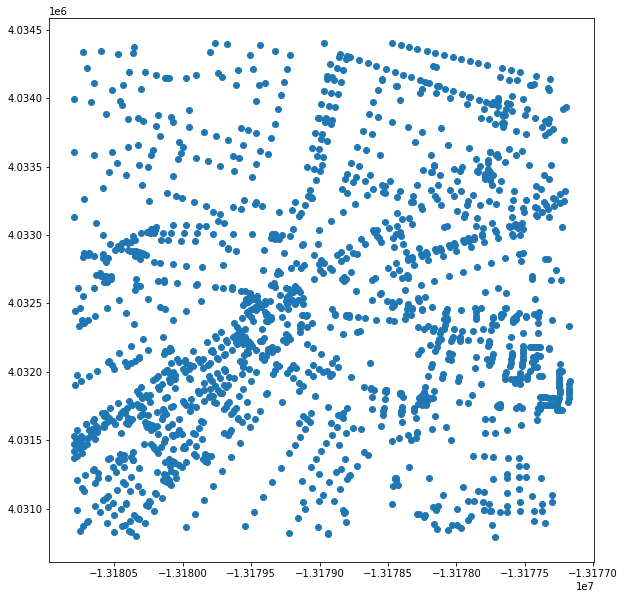

In [17]:
gdf_nodes_bike.plot(figsize=(10,10))

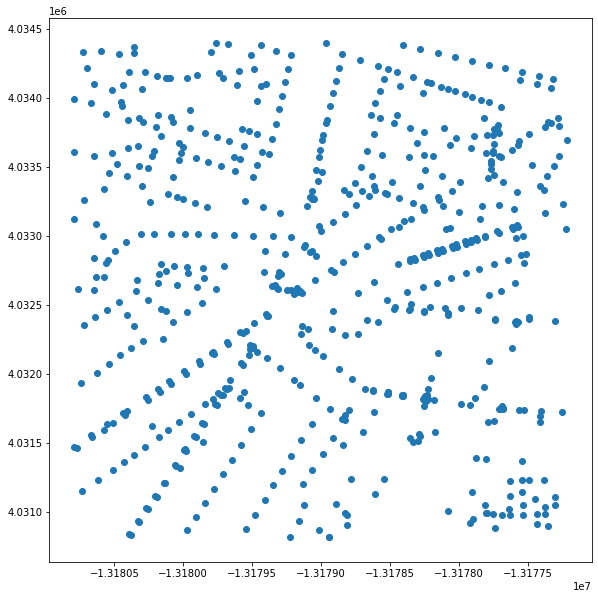

In [18]:
gdf_nodes_drive.plot(figsize=(10,10))

In [19]:
gdf_edges.head()

osmid              name       highway  oneway  length  \
0   37688373    Cardiff Avenue   residential   False  11.071   
1  384189232  Culver Boulevard       primary   False  57.903   
2  384281580  Culver Boulevard       primary   False  16.275   
3   47186577               NaN  primary_link   False  50.056   
4  150945301       Main Street   residential   False   8.605   

                                            geometry lanes service maxspeed  \
0  LINESTRING (-13179659.379 4031958.355, -131796...   NaN     NaN      NaN   
1  LINESTRING (-13179659.379 4031958.355, -131796...     4     NaN      NaN   
2  LINESTRING (-13179659.379 4031958.355, -131796...     3     NaN      NaN   
3  LINESTRING (-13179659.379 4031958.355, -131796...     1     NaN      NaN   
4  LINESTRING (-13179581.211 4032077.316, -131795...   NaN     NaN      NaN   

   ref bridge access junction tunnel         u           v  key  
0  NaN    NaN    NaN      NaN    NaN  15857110  3978709454    0  
1  NaN    NaN    NaN      NaN    NaN  15857110    62631403    0  
2  NaN    NaN    NaN      NaN    NaN  15857110  3978709455    0  
3  NaN    NaN    NaN      NaN    NaN  15857110   601384536    0  
4  NaN    NaN    NaN      NaN    NaN  15857111  3978710109    0

In [20]:
gdf_edges_bike.head()

osmid  oneway lanes              name      highway   length  \
0  384189232    True     4  Culver Boulevard      primary   57.903   
1   37688373   False   NaN    Cardiff Avenue  residential   45.876   
2  384189541   False   NaN       Main Street  residential   16.009   
3  150945301   False   NaN       Main Street  residential   84.935   
4  384281580    True     3  Culver Boulevard      primary  117.848   

                                            geometry service maxspeed  ref  \
0  LINESTRING (-13179659.379 4031958.355, -131796...     NaN      NaN  NaN   
1  LINESTRING (-13179659.379 4031958.355, -131796...     NaN      NaN  NaN   
2  LINESTRING (-13179581.211 4032077.316, -131795...     NaN      NaN  NaN   
3  LINESTRING (-13179581.211 4032077.316, -131795...     NaN      NaN  NaN   
4  LINESTRING (-13179581.211 4032077.316, -131795...     NaN      NaN  NaN   

  bridge access junction tunnel         u          v  key  
0    NaN    NaN      NaN    NaN  15857110   62631403    0  
1    NaN    NaN      NaN    NaN  15857110  257174488    0  
2    NaN    NaN      NaN    NaN  15857111  601384540    0  
3    NaN    NaN      NaN    NaN  15857111  257174467    0  
4    NaN    NaN      NaN    NaN  15857111   15857110    0

In [21]:
gdf_edges_drive.head()

osmid  oneway lanes              name      highway  \
0               384189232    True     4  Culver Boulevard      primary   
1                37688373   False   NaN    Cardiff Avenue  residential   
2               384189541   False   NaN       Main Street  residential   
3  [393132600, 150945301]   False   NaN       Main Street  residential   
4               384281580    True     3  Culver Boulevard      primary   

    length                                           geometry maxspeed  ref  \
0   57.903  LINESTRING (-13179659.379 4031958.355, -131796...      NaN  NaN   
1  180.577  LINESTRING (-13179659.379 4031958.355, -131796...      NaN  NaN   
2   16.009  LINESTRING (-13179581.211 4032077.316, -131795...      NaN  NaN   
3  138.421  LINESTRING (-13179581.211 4032077.316, -131795...      NaN  NaN   
4  117.848  LINESTRING (-13179581.211 4032077.316, -131795...      NaN  NaN   

  bridge access junction         u          v  key  
0    NaN    NaN      NaN  15857110   62631403    0  
1    NaN    NaN      NaN  15857110  123067518    0  
2    NaN    NaN      NaN  15857111  601384540    0  
3    NaN    NaN      NaN  15857111  123067516    0  
4    NaN    NaN      NaN  15857111   15857110    0

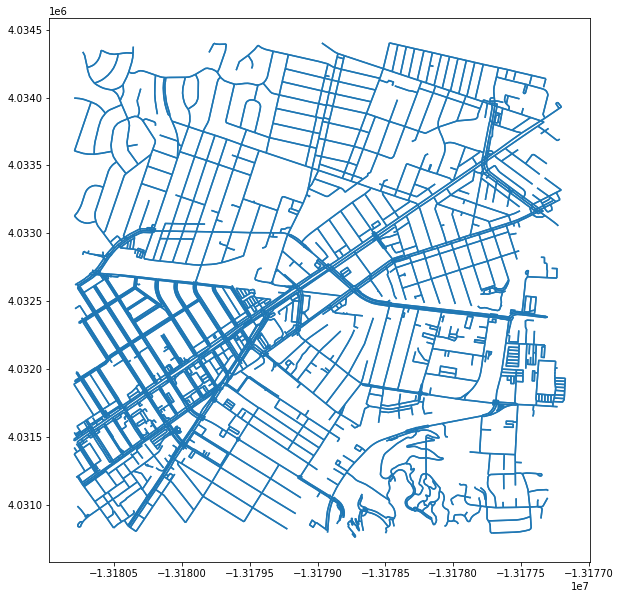

In [22]:
gdf_edges.plot(figsize=(10,10))

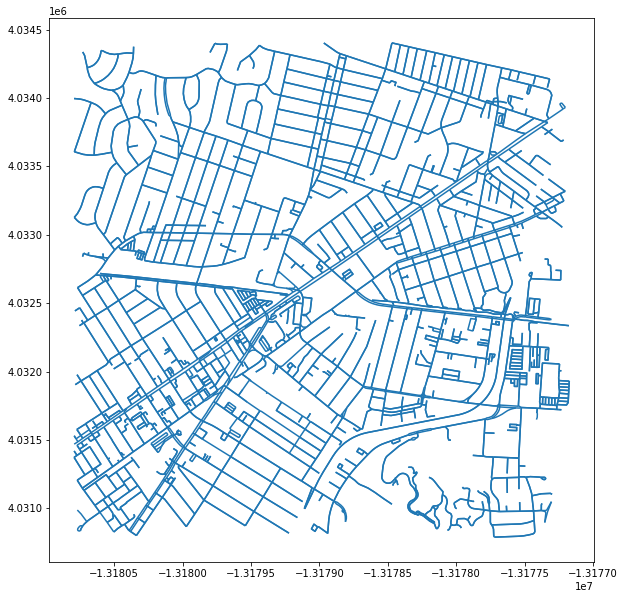

In [23]:
gdf_edges_bike.plot(figsize=(10,10))

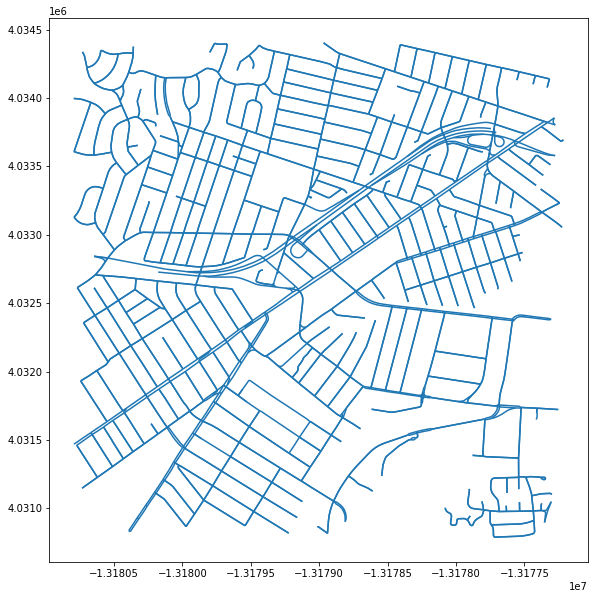

In [24]:
gdf_edges_drive.plot(figsize=(10,10))

Okay, yay! Nodes and edges are converted. I do want to do some data exploration

I am first going to run a .value_counts function to look at the max speed in road of the edges in the map.

In [25]:
gdf_edges['maxspeed'].value_counts()

35 mph    230
40 mph    150
25 mph    132
15 mph    108
30 mph     30
5 mph      16
10 mph     10
45 mph      4
15          4
65 mph      2
20 mph      2
Name: maxspeed, dtype: int64

Oh wow, I wasn't expecting 5mph streets, wonder where does are at. 

In [26]:
gdf_edges_bike['maxspeed'].value_counts()

35 mph    174
25 mph    117
40 mph     68
15 mph     68
30 mph     26
5 mph      10
10 mph      8
45 mph      3
15          2
20 mph      2
65 mph      1
Name: maxspeed, dtype: int64

In [27]:
gdf_edges_drive['maxspeed'].value_counts()

35 mph    111
25 mph     82
40 mph     31
65 mph     20
30 mph     16
15 mph      6
45 mph      3
20 mph      2
Name: maxspeed, dtype: int64

Now, I am going to look at the stats of the network. I don't think I'll be using it, but I want to take a look. 

In [28]:
stats = ox.basic_stats(G, circuity_dist='euclidean')
stats

{'n': 2468,
 'm': 7430,
 'k_avg': 6.021069692058346,
 'intersection_count': 2123,
 'streets_per_node_avg': 3.0753646677471638,
 'streets_per_node_counts': {0: 0, 1: 345, 2: 0, 3: 1264, 4: 842, 5: 17},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.13978930307941653,
  2: 0.0,
  3: 0.5121555915721232,
  4: 0.3411669367909238,
  5: 0.006888168557536467},
 'edge_length_total': 405311.6180000003,
 'edge_length_avg': 54.550688829071376,
 'street_length_total': 202655.8089999997,
 'street_length_avg': 54.55068882907125,
 'street_segments_count': 3715,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 0.8737262214286263,
 'self_loop_proportion': 0.0034993270524899056,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [29]:
stats = ox.basic_stats(G_bike, circuity_dist='euclidean')
stats

{'n': 1593,
 'm': 4024,
 'k_avg': 5.0521029504080355,
 'intersection_count': 1327,
 'streets_per_node_avg': 2.8738229755178906,
 'streets_per_node_counts': {0: 0, 1: 266, 2: 15, 3: 979, 4: 320, 5: 13},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1669805398618958,
  2: 0.009416195856873822,
  3: 0.6145637162586315,
  4: 0.20087884494664154,
  5: 0.008160703075957313},
 'edge_length_total': 294421.48100000055,
 'edge_length_avg': 73.16637201789278,
 'street_length_total': 160289.75999999966,
 'street_length_avg': 72.00797843665752,
 'street_segments_count': 2226,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 0.8723130906659884,
 'self_loop_proportion': 0.005218687872763419,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [30]:
stats = ox.basic_stats(G_drive, circuity_dist='euclidean')
stats

{'n': 640,
 'm': 1579,
 'k_avg': 4.934375,
 'intersection_count': 564,
 'streets_per_node_avg': 3.0921875,
 'streets_per_node_counts': {0: 0, 1: 76, 2: 6, 3: 350, 4: 199, 5: 9},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.11875,
  2: 0.009375,
  3: 0.546875,
  4: 0.3109375,
  5: 0.0140625},
 'edge_length_total': 199191.99700000053,
 'edge_length_avg': 126.15072640912003,
 'street_length_total': 115679.32800000004,
 'street_length_avg': 122.6716097560976,
 'street_segments_count': 943,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 0.8462616174718581,
 'self_loop_proportion': 0.001266624445851805,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

Since I projected my data to web Mercator, I have to get the center_nodes to map out the location of the transit station (btw this is the culvert city stop along the expo line).

In [31]:
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13180796.051583838
4030785.8516317927
-13177172.958380884
4034403.229993815


In [32]:
minx, miny, maxx, maxy = gdf_nodes_bike.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13180793.558027243
4030791.881655285
-13177172.958380884
4034403.229993815


In [33]:
minx, miny, maxx, maxy = gdf_nodes_drive.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13180793.558027243
4030815.598883305
-13177214.87016917
4034402.585154349


In [34]:
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13179004.214098208
4032609.092018827


Okay, now I am going to get the nearest node to the lat/long of the train station I am interested in examining. 

In [35]:
center_node= ox.get_nearest_node(G,(centroid_y, centroid_x), method='euclidean')
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 18166100


In [36]:
center_node= ox.get_nearest_node(G_bike,(centroid_y, centroid_x), method='euclidean')
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 18166100


In [37]:
center_node= ox.get_nearest_node(G_drive,(centroid_y, centroid_x), method='euclidean')
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 18166100


Now, I am going to call the row that belongs to the point_node.

In [38]:
gdf_nodes.loc[[center_node]]

y             x     osmid highway         lon        lat  \
18166100  4.032680e+06 -1.317904e+07  18166100     NaN -118.389347  34.028879   

                                   geometry  
18166100  POINT (-13179041.846 4032680.457)

In [39]:
gdf_nodes_bike.loc[[center_node]]

y             x     osmid highway         lon        lat  \
18166100  4.032680e+06 -1.317904e+07  18166100     NaN -118.389347  34.028879   

                                   geometry  
18166100  POINT (-13179041.846 4032680.457)

In [40]:
gdf_nodes_drive.loc[[center_node]]

y             x     osmid highway         lon        lat  \
18166100  4.032680e+06 -1.317904e+07  18166100     NaN -118.389347  34.028879   

          ref                           geometry  
18166100  NaN  POINT (-13179041.846 4032680.457)

Okay, so now I am going to attempt a simple map where I just map both nodes and a red circle representing the train station.

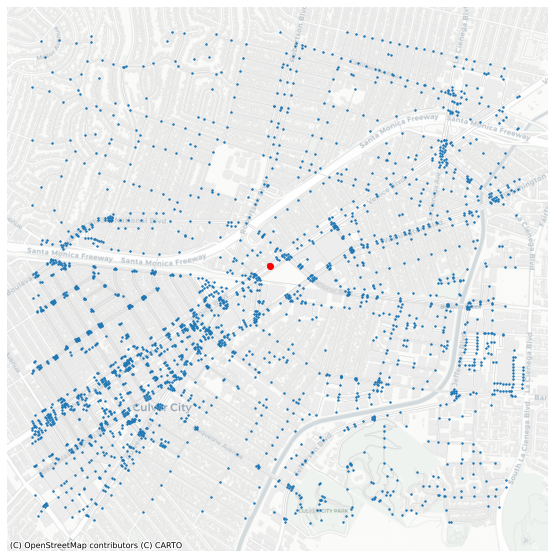

In [41]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

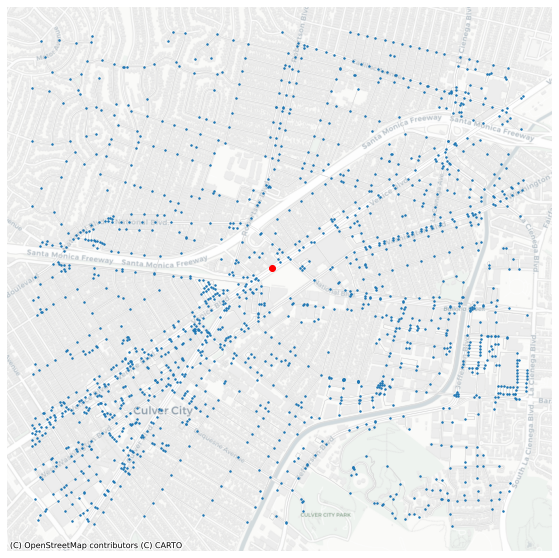

In [42]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges_bike.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)

# add all nodes to ax
gdf_nodes_bike.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes_bike.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

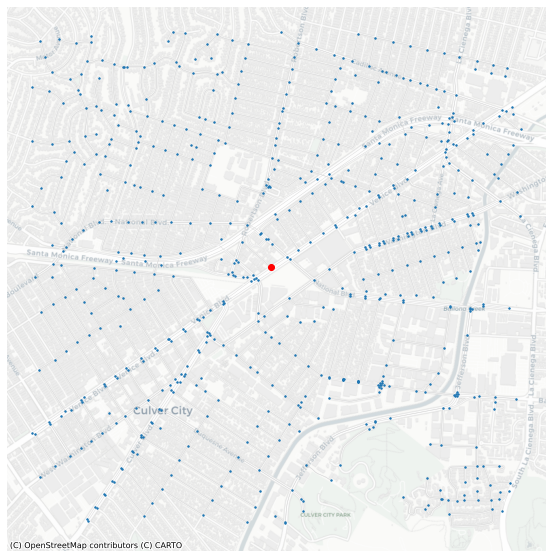

In [43]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges_drive.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)

# add all nodes to ax
gdf_nodes_drive.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes_drive.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Now let's calculate some walking distances by calculating travel cost! 

In [44]:
gdf_edges[['osmid','name','highway','length']].sample(5)

osmid                 name    highway   length
318   [398583268, 398152534]  Robertson Boulevard  secondary  108.053
5023               489946598                  NaN    service   27.690
2945               394767348                  NaN    service   83.377
3952               394767361                  NaN    footway  137.374
5431               813438368                  NaN    footway   24.846

In [45]:
gdf_edges_bike[['osmid','name','highway','length']].sample(5)

osmid                 name      highway   length
3957               893442168                  NaN      service    7.628
1441  [398588235, 865180372]  Robertson Boulevard    secondary   66.968
2316               391402024                  NaN      service   22.701
237                 13457317     Sherbourne Drive  residential  130.978
2273               384136555                  NaN      service   81.459

In [46]:
gdf_edges_drive[['osmid','name','highway','length']].sample(5)

osmid            name        highway   length
558               165790337    Shelby Drive    residential  360.310
998   [27165177, 398724851]             NaN  motorway_link  206.838
1171              150913665   Regent Street    residential   86.822
752                13375137  Hubbard Street    residential  236.836
1277               26664137  Ince Boulevard    residential  101.740

In [47]:
gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute_walk

In [48]:
gdf_edges_bike['bike_time'] = gdf_edges_bike['length']/meter_per_minute_bike

In [49]:
gdf_edges_drive['drive_time'] = gdf_edges_drive['length']/meter_per_minute_drive

In [50]:
gdf_edges[['osmid','name','highway','length','walk_time']].sample(10)

osmid                  name      highway   length  \
1913               132664732                   NaN      service    9.730   
4202  [398597034, 398597043]      Culver Boulevard      primary   63.512   
7380               901371804                   NaN      footway   18.502   
1251                13430555    Beverlywood Street  residential   92.368   
2495               384152083  Washington Boulevard    secondary   86.797   
3723               393010947                   NaN      service   77.443   
4305               394767359                   NaN      footway   17.859   
3365               392386776                   NaN      footway  352.706   
570                901371797    Cattaraugus Avenue  residential   14.695   
3025               391699044                   NaN      footway   40.958   

      walk_time  
1913   0.129733  
4202   0.846827  
7380   0.246693  
1251   1.231573  
2495   1.157293  
3723   1.032573  
4305   0.238120  
3365   4.702747  
570    0.195933  
3025   0.546107

In [51]:
gdf_edges_bike[['osmid','name','highway','length','bike_time']].sample(10)

osmid                  name      highway  \
2063                           37688451                   NaN      service   
214                            13333532        Sentney Avenue  residential   
2984                          489946599                   NaN      service   
2274  [159608218, 172596339, 384152082]  Washington Boulevard    secondary   
338                            13325993           Olin Street  residential   
1025                           13445170        Krueger Street  residential   
2880                          310006003                   NaN      service   
3548                          745180717        Lucerne Avenue  residential   
3027  [489946612, 489946606, 489946607]                   NaN      service   
1626                           56180609                   NaN      service   

       length  bike_time  
2063   15.622   0.058291  
214   111.834   0.417291  
2984   28.840   0.107612  
2274  138.795   0.517892  
338    39.442   0.147172  
1025   83.576   0.311851  
2880   18.929   0.070631  
3548   28.620   0.106791  
3027   61.894   0.230948  
1626   91.048   0.339731

In [52]:
gdf_edges_drive[['osmid','name','highway','length','drive_time']].sample(10)

osmid                   name      highway   length  drive_time
807   165787142  South Canfield Avenue  residential   82.876    0.102952
771   165782970     Cattaraugus Avenue  residential   76.462    0.094984
177    13325993            Olin Street  residential   94.058    0.116842
1532  765321044  South Canfield Avenue  residential   29.263    0.036352
735   159257768   Exposition Boulevard  residential  114.448    0.142171
471    13415156   South Corning Street  residential  101.992    0.126698
121    13285391      Kincardine Avenue  residential   76.520    0.095056
1430  331162062   Washington Boulevard    secondary   26.770    0.033255
1282  165782972         Lucerne Avenue  residential  161.490    0.200609
412    13319682       West 24th Street  residential  292.797    0.363723

Okay, that looks about right! Now It's time to do some Isochrone mapping. I will attempt the "better" isochrones method, but I will do the simpler process if that fails. 

In [53]:
trip_times.sort(reverse=True)
print(trip_times)

[20, 15, 10, 5]


In [54]:
def make_iso_polys(G, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': list(subgraph.nodes)}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys

In [55]:
def make_iso_polys(G_bike, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys_bike = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G_bike, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': list(subgraph.nodes)}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G_bike.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys_bike.append(new_iso)
    return isochrone_bike

In [56]:
def make_iso_polys(G_drive, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys_drive = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G_drive, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': list(subgraph.nodes)}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G_drive.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys_drive.append(new_iso)
    return isochrone_polys_drive

In [57]:
isochrone_polys = make_iso_polys(G, edge_buff=25, node_buff=0, infill=True)

In [58]:
isochrone_polys_bike = make_iso_polys(G_bike, edge_buff=25, node_buff=0, infill=True)

In [59]:
isochrone_polys_drive = make_iso_polys(G_drive, edge_buff=25, node_buff=0, infill=True)

In [60]:
better_isos = gpd.GeoDataFrame()
better_isos['geometry'] = None

In [61]:
better_isos_bike = gpd.GeoDataFrame()
better_isos_bike['geometry'] = None

In [62]:
better_isos_drive = gpd.GeoDataFrame()
better_isos_drive['geometry'] = None

In [63]:
for i in range(len(isochrone_polys)):
    better_isos.loc[i,'geometry'] = isochrone_polys[i]
    better_isos.loc[i,'time'] =  str(trip_times[i]) + ' mins'
better_isos

geometry     time
0  POLYGON ((-13178877.690 4031542.748, -13178825...  20 mins
1  POLYGON ((-13178489.986 4031835.126, -13178490...  15 mins
2  POLYGON ((-13179458.905 4032170.909, -13179459...  10 mins
3  POLYGON ((-13179257.604 4032476.903, -13179258...   5 mins

In [64]:
for i in range(len(isochrone_polys_bike)):
    better_isos_bike.loc[i,'geometry'] = isochrone_polys_bike[i]
    better_isos_bike.loc[i,'time'] =  str(trip_times[i]) + ' mins'
better_isos_bike

geometry     time
0  POLYGON ((-13179089.858 4030981.191, -13179089...  20 mins
1  POLYGON ((-13178496.197 4031796.579, -13178499...  15 mins
2  POLYGON ((-13178596.841 4031877.179, -13178597...  10 mins
3  POLYGON ((-13179091.660 4032452.153, -13179084...   5 mins

In [65]:
for i in range(len(isochrone_polys_drive)):
    better_isos_drive.loc[i,'geometry'] = isochrone_polys_drive[i]
    better_isos_drive.loc[i,'time'] =  str(trip_times[i]) + ' mins'
better_isos_drive

geometry     time
0  POLYGON ((-13178914.602 4030813.210, -13178914...  20 mins
1  POLYGON ((-13179101.287 4031199.823, -13179103...  15 mins
2  POLYGON ((-13178808.689 4031683.441, -13178810...  10 mins
3  POLYGON ((-13179167.771 4032306.897, -13179167...   5 mins

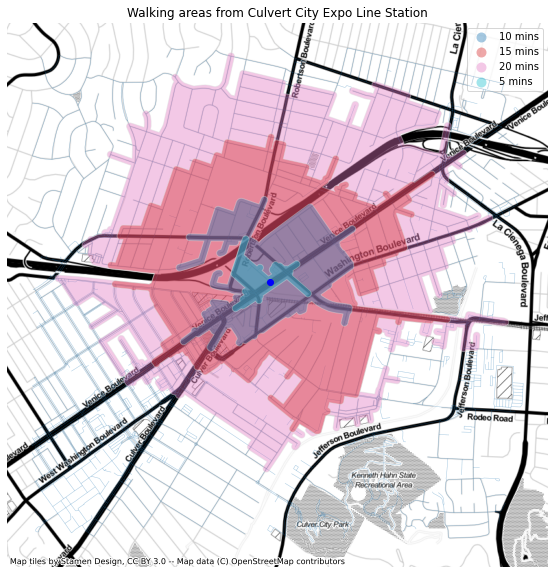

In [66]:
# create a beautiful map with all relevant layers
# set up the subplots
fig, ax = plt.subplots(figsize=(10,10))

# add the isochrones
better_isos.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='tab10', 
                edgecolor='gainsboro',
                 legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='b', zorder=30)

# add all nodes
# gdf_nodes.plot(ax=ax, 
#                markersize=1, 
#                zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from Culvert City Expo Line Station')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.Toner)

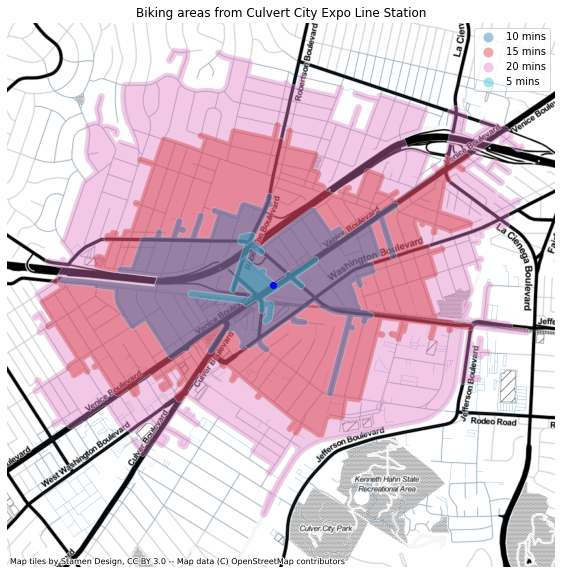

In [67]:
# create a beautiful map with all relevant layers
# set up the subplots
fig, ax = plt.subplots(figsize=(10,10))

# add the isochrones
better_isos_bike.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='tab10', 
                edgecolor='gainsboro',
                 legend=True,
                zorder=20)

# add the center node in red
gdf_nodes_bike.loc[[center_node]].plot(ax=ax,color='b', zorder=30)

# add all nodes
# gdf_nodes.plot(ax=ax, 
#                markersize=1, 
#                zorder=10)

# add the edges
gdf_edges_bike.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Biking areas from Culvert City Expo Line Station')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.Toner)

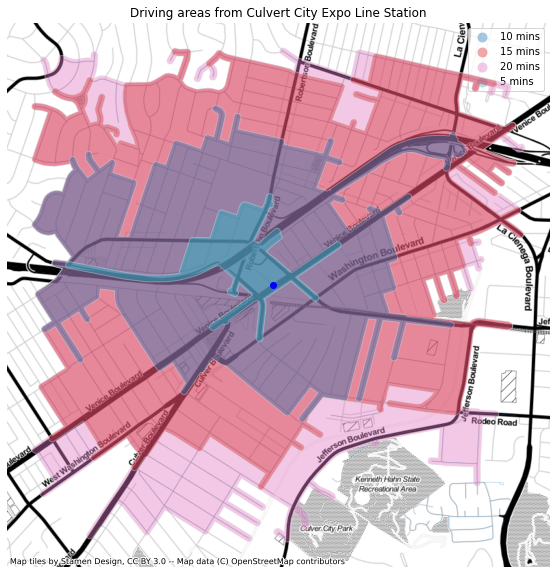

In [68]:
# create a beautiful map with all relevant layers
# set up the subplots
fig, ax = plt.subplots(figsize=(10,10))

# add the isochrones
better_isos_drive.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='tab10', 
                edgecolor='gainsboro',
                 legend=True,
                zorder=20)

# add the center node in red
gdf_nodes_drive.loc[[center_node]].plot(ax=ax,color='b', zorder=30)

# add all nodes
# gdf_nodes.plot(ax=ax, 
#                markersize=1, 
#                zorder=10)

# add the edges
gdf_edges_drive.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Driving areas from Culvert City Expo Line Station')

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.Toner)

Well that turn out almost like I wanted it, I don't seem to be able to figure out how to reformat the legend so that the min show up in order.... but at least it's mapping properly. I am a bit surprise that the biking areas seem to cover larger geometries than the driving areas... 

# The End